# Numerical Partial Differential Equation III: Finite Volume

In the previous lecture, we explored three fundamental finite difference schemes used to solve the linear advection equation: the Forward Time Centered Space (FTCS) scheme, the Upwind scheme, and the Lax-Wendroff scheme.
Each of these methods offers a unique balance between simplicity, accuracy, and stability.
The FTCS scheme, while straightforward to implement, was found to be inherently unstable for advection problems.
The Upwind scheme addressed some stability issues by introducing numerical diffusion, which helped in suppressing non-physical oscillations but at the cost of smearing sharp gradients.
The Lax-Wendroff scheme provided a higher order of accuracy by incorporating both first and second-order spatial derivatives, reducing numerical diffusion and better capturing wave propagation, though it introduced dispersive errors.

Despite their effectiveness in one-dimensional problems, finite difference methods (FDM) like FTCS, Upwind, and Lax-Wendroff encounter significant challenges when applied to more complex scenarios.
Specifically, FDMs struggle with handling complex geometries and discontinuities, such as shock waves, which are common in multi-dimensional fluid dynamics problems.
Additionally, FDMs often face difficulties in conserving physical quantities, such as mass, momentum, and energy, across control volumes, especially when dealing with irregular meshes or boundaries.

To overcome these limitations, **Finite Volume Methods (FVM)** have been developed as a robust alternative to finite difference approaches.
Unlike FDMs, which focus on approximating derivatives at discrete points, FVMs emphasize the conservation of physical quantities within discrete control volumes.
This integral approach ensures that fluxes entering and leaving a control volume are balanced, inherently satisfying conservation laws.
Consequently, FVMs are well-suited for solving complex, multi-dimensional problems involving sharp gradients and discontinuities, making them a preferred choice in computational fluid dynamics and related fields.

In this lecture, we will delve into the motivation behind Finite Volume Methods, understand their foundational principles, and explore how traditional finite difference schemes can be reformulated within the FVM framework.
We will also introduce a simple finite volume method tailored for solving two-dimensional shock problems, highlighting the advantages of FVMs in handling complex flow phenomena.

## Motivation for Finite Volume Methods

Finite Volume Methods (FVM) have become a cornerstone in computational fluid dynamics and other areas involving the simulation of physical phenomena governed by conservation laws.
The motivation behind adopting FVM over traditional Finite Difference Methods (FDM) stems from several key advantages that address the limitations inherent in FDMs.

1. **Conservation Laws and Fluxes**

   At the heart of many physical systems are conservation laws, which dictate that certain quantities such as mass, momentum, and energy remain constant within a closed system.
   FVM inherently respects these conservation principles by integrating the governing equations over discrete control volumes.
   Unlike FDMs, which approximate derivatives at specific points, FVMs focus on the fluxes of conserved quantities across the boundaries of control volumes.
   By ensuring that the net flux into a control volume equals the rate of change of the conserved quantity within that volume, FVMs maintain local conservation properties.
   This integral approach guarantees that the discretized equations faithfully represent the continuous conservation laws, leading to more accurate and physically consistent solutions.

3. **Handling Discontinuities and Shocks**

   One of the significant challenges in numerical simulations is accurately capturing discontinuities and shock waves, which are abrupt changes in the flow properties.
   FDMs, especially lower-order schemes like FTCS, often struggle with these features due to excessive numerical diffusion, which smears out sharp gradients and can distort the physical phenomena being modeled.
   In contrast, FVMs are adept at handling such discontinuities.
   The flux-based formulation allows FVMs to more precisely track the movement and interaction of shocks and contact discontinuities.
   By accurately computing the fluxes at control volume interfaces, FVMs can maintain the integrity of sharp gradients without introducing significant numerical artifacts.
   This capability makes FVMs particularly suitable for simulating high-speed flows and other scenarios where shock waves play a crucial role.

5. **Advantages of FVM Over FDM and Finite Element Methods (FEM)**

   Finite Volume Methods offer several advantages over both Finite Difference Methods and Finite Element Methods:

   * **Local Conservation Properties:** FVMs ensure that the conserved quantities are maintained within each control volume.
     This local conservation is essential for accurately modeling physical systems, especially over long simulation times or in complex flow conditions.

   * **Flexibility in Handling Complex Geometries and Boundary Conditions:** FVMs are inherently more flexible when dealing with irregular geometries and complex boundary conditions.
     The ability to define control volumes of various shapes and sizes allows FVMs to conform to intricate domain boundaries, making them suitable for real-world applications where geometrical complexity is common.

   * **Compatibility with Unstructured Meshes:** FVMs seamlessly integrate with unstructured meshes, which are essential for discretizing domains with irregular shapes.
     Unstructured meshes allow for greater adaptability and refinement in regions requiring higher accuracy, such as areas with steep gradients or complex flow features.
     This compatibility enhances the overall accuracy and efficiency of the numerical simulations.

   * **Ease of Incorporating Physical Models:** FVMs facilitate the incorporation of additional physical models, such as turbulence models or multi-phase flow dynamics, within the control volume framework.
     This modularity enables the extension of FVMs to a wide range of applications beyond simple advection or diffusion processes.

   These advantages make FVMs a powerful tool for accurately and efficiently solving a broad spectrum of physical problems that are challenging for traditional Finite Difference Methods and Finite Element Methods.

## Basics of Finite Volume Methods

Finite Volume Methods (FVM) are widely used for solving Partial Differential Equations (PDEs) that express conservation laws.
Unlike Finite Difference Methods (FDM), which approximate derivatives at discrete points, FVM focuses on conserving quantities within discrete control volumes.
This section introduces the foundational concepts of FVM, including control volumes, integral formulation of conservation laws, discretization of fluxes, and numerical flux functions.

### Control Volumes and Integral Formulation

At the core of Finite Volume Methods is the concept of dividing the computational domain into small, non-overlapping regions called **control volumes**.
Each control volume encompasses a portion of the physical domain and is bounded by its interfaces with neighboring control volumes.

**Definition of Control Volumes:**
* A **control volume** is a finite region in space over which conservation laws are applied.
* The entire domain is partitioned into these control volumes, ensuring that they cover the domain without gaps or overlaps.

**Integral Form of Conservation Laws:**
Finite Volume Methods are based on the integral form of conservation laws. Consider a general conservation equation:
\begin{align}
\frac{\partial \phi}{\partial t} + \nabla \cdot \mathbf{F} = S
\end{align}
where:
- $\phi$ is the conserved quantity (e.g., mass, momentum, energy),
- $\mathbf{F}$ is the flux vector representing the flow of $\phi$,
- $S$ is a source term.

**Integral Formulation:**
Integrate the conservation equation over a control volume $V$:
\begin{align}
\int_V \frac{\partial \phi}{\partial t} \, dV + \int_{V} \nabla\cdot\mathbf{F} \, dV = \int_V S \, dV
\end{align}

**Applying the Divergence Theorem:**
The integral of the divergence of $\mathbf{F}$ over the control volume is converted to a surface integral:
\begin{align}
\frac{d}{dt} \int_V \phi \, dV + \int_{\partial V} \mathbf{F} \cdot \mathbf{n} \, dS = \int_V S \, dV
\end{align}
where $\mathbf{n}$ is the outward-pointing unit normal vector on the boundary $\partial V$ of volume $V$.
This equation states that the rate of change of $\phi$ within the control volume plus the net flux of $\phi$ across its boundaries equals the total source of $\phi$ within the volume.

Note that this is the same formulation that we derived the fluid dynamic equations using conservation laws.

### Discretization of Fluxes

To solve the integral conservation laws numerically, the flux integrals across the control volume boundaries must be approximated.
The discretization process involves several steps:

1. **Mesh Generation:**
   * Divide the computational domain into a finite number of control volumes.
   * Common mesh types include structured (e.g., rectangular, triangular) and unstructured meshes.

2. **Control Volume Centroid:**
   * Identify the centroid or a representative point within each control volume, typically denoted as $(x_i, y_i)$ in 2D or $(x_i, y_i, z_i)$ in 3D.

3. **Flux Approximation:**
   * Approximate the flux $\mathbf{F}$ at each face of the control volume.
   * The flux at a face is determined by evaluating the flux function based on the values of $\phi$ from adjacent control volumes.

4. **Surface Integral Discretization:**
   * Replace the continuous surface integral with a discrete sum over all faces of the control volume:
     \begin{align}
     \int_{\partial V} \mathbf{F} \cdot \mathbf{n} \, dS \approx \sum_{\text{faces}} \mathbf{F}_{\text{face}} \cdot A_{\text{face}}
     \end{align}
     where $A_{\text{face}}$ is the length (for 2D problem) or area (for 3D problem) of the "face".

### Numerical Flux Functions

The accuracy and stability of the Finite Volume Method heavily depend on the choice of **numerical flux functions**.
Numerical flux functions approximate the physical fluxes at the interfaces between control volumes based on the values of $\phi$ from adjacent cells.
Several types of numerical flux functions exist, each with its own advantages and applicability:

1. **Central Flux:**
   * A simple average of the fluxes from adjacent control volumes.
   * **Formula:**
     \begin{align}
     \mathbf{F}_{i+\frac{1}{2}} = \frac{1}{2} \left( \mathbf{F}(u_i) + \mathbf{F}(u_{i+1}) \right)
     \end{align}
   * **Advantages:**
     * Easy to implement.
     * Second-order accurate for smooth solutions.
   * **Disadvantages:**
     * Can be unstable for hyperbolic equations like advection.
     * Does not account for wave direction, leading to numerical oscillations.

2. **Upwind Flux:**
   * Takes the flux from the upstream direction based on the wave speed $c$.
   * **Formula for One-Dimensional Advection:**
     \begin{align}
     \mathbf{F}_{i+\frac{1}{2}} =
     \begin{cases}
       \mathbf{F}(u_i) & \text{if } c > 0 \\
       \mathbf{F}(u_{i+1}) & \text{if } c < 0
     \end{cases}
     \end{align}
   * **Advantages:**
     * Enhances stability by considering wave direction.
     * Reduces numerical oscillations near discontinuities.
   * **Disadvantages:**
     * Introduces numerical diffusion, which can smear sharp gradients.

3. **Riemann Solver-Based Fluxes:**
   * Solve the Riemann problem at each interface to determine the flux.
   * **Examples:**
     * Exact Riemann Solver.
     * Roe's Approximate Riemann Solver.
   * **Advantages:**
     * Accurately captures wave interactions.
     * Suitable for complex systems of conservation laws.
   * **Disadvantages:**
     * More computationally intensive.
     * Requires solving characteristic equations.

4. **HLL and HLLC Fluxes:**
   * Variants of Riemann solvers that simplify the wave structure.
   * **HLL (Harten, Lax, and van Leer):**
     * Considers only the fastest left and right waves.
   * **HLLC (HLL with Contact):**
     * Includes contact discontinuities in addition to shock waves.
   * **Advantages:**
     * Balances accuracy and computational efficiency.
     * Handles a wide range of flow conditions.
   * **Disadvantages:**
     * Still more complex than central or upwind fluxes.

**Choosing the Appropriate Numerical Flux Function:**
The selection of a numerical flux function depends on the specific requirements of the problem:
- **For Simple Problems:** Central or upwind fluxes may suffice.
- **For Problems with Shocks and Complex Wave Interactions:** Riemann solver-based fluxes or HLL/HLLC fluxes are more appropriate.

## Shock Tube Problem

The **Shock Tube Problem** is a quintessential test case in computational fluid dynamics (CFD) used to evaluate and validate numerical schemes for solving hyperbolic conservation laws, particularly the Euler equations governing compressible flow.
This problem encapsulates fundamental phenomena such as shock waves, contact discontinuities, and rarefaction waves, making it an ideal benchmark for assessing the accuracy and robustness of numerical methods.

### Background and Significance

The Shock Tube Problem, also known as the Riemann problem in one dimension, was originally formulated to understand the behavior of gas dynamics when subjected to sudden changes in pressure and density.
It involves a closed tube divided into two regions by an impermeable diaphragm.
Each region contains gas at different states of pressure, density, and temperature.
Upon the removal of the diaphragm, the gases begin to interact, leading to the formation of shock waves and other discontinuities.

**Historical Context:**
* **Origins:** The study of shock waves dates back to the early 20th century with contributions from scientists like Ernst Mach and Theodore von Kármán.
  The Shock Tube Problem emerged as a simplified model to study complex shock interactions in a controlled environment.
* **Applications:** Understanding shock waves is crucial in various engineering applications, including aerospace engineering (e.g., supersonic flight), astrophysics (e.g., supernova explosions), and mechanical engineering (e.g., internal combustion engines).

**Importance in CFD:**
* **Benchmarking:** The Shock Tube Problem serves as a standard benchmark for validating numerical schemes.
  An accurate numerical method should reproduce the key features of the analytical solution, including the correct propagation speeds and amplitudes of shock waves and rarefaction fans.
* **Understanding Numerical Behavior:** By comparing numerical results with the analytical solution, researchers can assess the performance of numerical methods in handling discontinuities, ensuring stability, and maintaining conservation properties.

### Governing Equations

The Shock Tube Problem is governed by the **Euler equations** for inviscid, compressible flow.
In one dimension, these equations can be expressed in their conservative form as:
\begin{align}
\frac{\partial \mathbf{U}}{\partial t} + \frac{\partial \mathbf{F}}{\partial x} = 0
\end{align}
where:
\begin{align}
\mathbf{U} = \begin{pmatrix}
\rho \\
\rho u \\
E
\end{pmatrix}, \quad
\mathbf{F} = \begin{pmatrix}
\rho u \\
\rho u^2 + p \\
u(E + p)
\end{pmatrix}
\end{align}
and the variables have their standard meaning:
* $\rho$: Density
* $u$: Velocity
* $p$: Pressure
* $E$: Total energy per unit volume

To close the system of equations, an **ideal gas law** is assumed:
\begin{align}
p = (\gamma - 1)\left(E - \frac{1}{2} \rho u^2\right)
\end{align}
where $\gamma$ is the **specific heat ratio** ($C_p/C_v$), typically taken as 1.4 for air.

### Analytical Theory and Exact Solution

The analytical solution to the Shock Tube Problem, often referred to as the **Riemann problem**, involves determining the evolution of the flow variables ($\rho, u, p$) over time given the initial discontinuity.
The solution comprises three distinct regions separated by different types of waves:

1. **Shock Wave:** A propagating discontinuity where pressure, density, and velocity increase abruptly.
2. **Contact Discontinuity:** A stationary interface separating regions of different densities but constant pressure and velocity.
3. **Rarefaction Wave:** An expanding region where pressure, density, and velocity decrease smoothly.

### Solution Structure

The solution typically evolves as follows:
* **Initial State (t = 0):** The diaphragm is removed, initiating the interaction between the two gas regions.
* **Shock Propagation:** A shock wave moves into the low-pressure region, compressing the gas and increasing its density and pressure.
* **Rarefaction Fan Formation:** Simultaneously, a rarefaction wave propagates into the high-pressure region, causing expansion and decreasing density and pressure.
* **Contact Discontinuity:** A contact discontinuity forms between the regions affected by the shock and rarefaction waves, marking a boundary of differing densities.

### Solution Structure and Regions

The Shock Tube Problem solution is divided into four distinct regions:

1. **Region 1 (Pre-Shock):** Original right (low-pressure) state ($\rho_R, u_R, p_R$).
2. **Region 2 (Post-Shock):** State behind the shock wave ($\rho_2, u_2, p_2$).
3. **Region 3 (Post-Rarefaction):** State behind the rarefaction wave ($\rho_3, u_3, p_3$).
4. **Region 4 (Pre-Rarefaction):** Original left (high-pressure) state ($\rho_L, u_L, p_L$).

### Wave Connections

- **Shock Wave (Region 1 to Region 2):** Compresses the gas, increasing density and pressure.
- **Contact Discontinuity (Region 2 to Region 3):** Maintains constant pressure and velocity but separates regions of different densities.
- **Rarefaction Wave (Region 3 to Region 4):** Expands the gas, decreasing density and pressure.

### Propagation Directions

- **Shock Wave:** Moves to the right.
- **Rarefaction Wave:** Moves to the left.
- **Contact Discontinuity:** Remains stationary if there are no external influences.

### Method of Characteristics:

The analytical solution leverages the **Method of Characteristics**, which transforms the partial differential equations into ordinary differential equations along characteristic lines. This approach simplifies the problem by tracking the propagation of information (waves) through the domain.

**Steps to Derive the Exact Solution:**

1. **Identify Wave Types:** Determine where shocks and rarefactions will form based on initial conditions.
2. **Estimate Wave Speeds:** Calculate the speeds at which the shock wave and rarefaction fan propagate.
3. **Solve for Post-Wave Conditions:** Use conservation laws across the shock and expansion relations within the rarefaction fan to find the states behind each wave.
4. **Construct the Solution:** Piece together the states separated by the shock, contact discontinuity, and rarefaction wave.

**Key Equations:**

* **Shock Relations (Rankine-Hugoniot Conditions):**
  \begin{align}
  \frac{\rho_2}{\rho_1} = \frac{(\gamma + 1)M_1^2}{(\gamma - 1)M_1^2 + 2}, \quad
  p_2 = p_1 \left(1 + \frac{2\gamma}{\gamma + 1}(M_1^2 - 1)\right), \quad
  u_2 = \frac{2 + (\gamma - 1)M_1^2}{(\gamma + 1)M_1^2} u_1
  \end{align}
  where $M_1$ is the Mach number before the shock.

* **Rarefaction Wave Relations:**
  \begin{align}
  \rho_3 &= \rho_1 \left(\frac{2}{\gamma + 1} + \frac{\gamma - 1}{\gamma + 1} \frac{u_1}{c_1}\right)^{\frac{2}{\gamma - 1}} \\
  p_3    &= p_1 \left(\frac{2}{\gamma + 1} + \frac{\gamma - 1}{\gamma + 1} \frac{u_1}{c_1}\right)^{\frac{2\gamma}{\gamma - 1}}
  \end{align}
  where $c_1 = \sqrt{\gamma p_1 / \rho_1}$ is the speed of sound before the rarefaction.

**Numerical Computation:**

The exact solution involves iterative methods and solving nonlinear equations, making it computationally intensive. However, it provides a precise benchmark against which numerical methods can be compared.

## Harten-Lax-van Leer (HLL) Approximate Rieman

The HLL solver, introduced by Harten, Lax, and van Leer in 1983, is an **approximate Riemann solver** designed to simplify the complex wave structure inherent in exact solutions.
Instead of resolving all characteristic waves (shocks, rarefactions, and contact discontinuities), the HLL solver approximates the solution by considering only the fastest left-moving and right-moving waves.

**Key Motivations:**

- **Computational Efficiency:** Exact Riemann solvers can be computationally intensive, especially for systems with multiple waves. HLL offers a balance between accuracy and computational cost.
- **Robustness:** By focusing on the dominant wave speeds, HLL maintains numerical stability and handles strong shocks effectively.
- **Simplicity:** The reduced wave structure simplifies the implementation, making it suitable for multi-dimensional problems.

### Wave Structure Assumptions in HLL

The HLL solver assumes that the solution to the Riemann problem consists of two **strong discontinuities** propagating in opposite directions:

1. **Left Wave ($S_L$):** Represents the fastest left-moving wave.
2. **Right Wave ($S_R$):** Represents the fastest right-moving wave.

Between these two waves lies a **star region** where the solution is approximated as a constant state. This simplification neglects intermediate waves such as contact discontinuities and slower-moving waves, thereby streamlining the flux computation.

The HLL solver constructs an approximate solution by estimating the wave speeds and computing the numerical flux based on the states and fluxes in the left and right regions.

### Estimating Wave Speeds ($S_L$ and $S_R$)

Accurate estimation of the wave speeds is crucial for the HLL solver's performance. The wave speeds encapsulate the fastest signal propagation in the left and right directions.

**Common Estimates:**

1. **Using Eigenvalues:**

   The wave speeds can be approximated using the eigenvalues of the Jacobian matrix $\mathbf{A} = \frac{\partial \mathbf{F}}{\partial \mathbf{U}}$:
   \begin{align}
   \mathbf{A} = \begin{pmatrix}
   u & \rho & 0 \\
   0 & u & 1/\rho \\
   0 & \gamma p & u
   \end{pmatrix}
   \end{align}

   The eigenvalues (wave speeds) are:
   \begin{align}
   \lambda_1 = u - c, \quad \lambda_2 = u, \quad \lambda_3 = u + c
   \end{align}
   where $c = \sqrt{\gamma \frac{p}{\rho}}$ is the speed of sound.

   The HLL wave speeds are then estimated as:
   \begin{align}
   S_L = \min(\lambda_1^L, \lambda_1^R), \quad S_R = \max(\lambda_3^L, \lambda_3^R)
   \end{align}

2. **Using Two-Speed Estimate:**

   A simpler, yet effective estimate is:
   \begin{align}
   S_L &= \min(u_L - c_L, u_R - c_R) \\
   S_R &= \max(u_L + c_L, u_R + c_R)
   \end{align}
   where the subscripts $L$ and $R$ denote left and right states, respectively.

### Computing Numerical Fluxes

Once the wave speeds are estimated, the numerical flux $\mathbf{F}_{\text{HLL}}$ can be computed based on the relative positions of $S_L$ and $S_R$:
\begin{align}
\mathbf{F}_{\text{HLL}} = \begin{cases}
\mathbf{F}_L & \text{if } S_L > 0 \\
\frac{S_R \mathbf{F}_L - S_L \mathbf{F}_R + S_L S_R (\mathbf{U}_R - \mathbf{U}_L)}{S_R - S_L} & \text{if } S_L \leq 0 \leq S_R \\
\mathbf{F}_R & \text{if } S_R < 0
\end{cases}
\end{align}

**Interpretation:**

- **Case 1 ($S_L > 0$):** All characteristics move to the right; the flux is determined solely by the left state.
- **Case 2 ($S_L \leq 0 \leq S_R$):** Characteristics influence both states; the flux is a weighted average accounting for both left and right states.
- **Case 3 ($S_R < 0$):** All characteristics move to the left; the flux is determined solely by the right state.

**Advantages of HLL Flux:**

- **Simplicity:** Requires only the estimation of two wave speeds.
- **Stability:** Robust against strong shocks and prevents non-physical oscillations.
- **Conservation:** Ensures the conservation of mass, momentum, and energy across control volumes.

**Limitations:**

- **Contact Discontinuity Smearing:** The HLL solver does not explicitly resolve contact discontinuities, leading to some numerical diffusion.
- **Wave Resolution:** Cannot capture all wave interactions present in the exact solution.

### Detailed Explanation of the HLL Scheme Implementation

The Python implementation provided above integrates the HLL Riemann solver within the Finite Volume Method framework to solve the 1D Shock Tube Problem.
Below is a comprehensive breakdown of each component and its role in the simulation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First, we define the physical and computational parameters, where:
* `L`: Length of the computational domain.
* `N`: Number of control volumes (cells) into which the domain is divided.
* `dx`: Width of each cell.
* `x`: Array representing the positions of cell centers.
* `CFL`: Courant number determines the time step based on the CFL condition for numerical stability.
* `t_final`: The simulation runs until this final time.
* `t`: Variable to keep track of the current simulation time.

In [2]:
# Physical Parameters
gamma = 1.4  # Specific heat ratio for air

# Computational Domain
L  = 1.0    # Length of the domain (meters)
N  = 100    # Number of cells
dx = L / N  # Cell width
x  = np.linspace(0.5*dx, L - 0.5*dx, N)  # Cell centers

# Time-Stepping Parameters
CFL     = 0.5   # Courant number
t_final = 0.25  # Final time (seconds)
t       = 0.0   # Initial time

Here, we initialize the conserved variables:
* `rho` (Density): Mass per unit volume.
* `rho * u` (Momentum): Momentum in the $x$-direction.
* `E` (Energy): Total energy per unit volume.
and store them in the state vector `U`.

The domain is initialized with higher density and pressure on the left side ($x < 0.5$) and lower values on the right side ($x \geq 0.5$), representing the classic setup of the Shock Tube Problem.

In [3]:
# Initialize Conserved Variables [rho, rho*u, E]
U = np.zeros((N, 3))

# Initial Conditions
rho0 = np.where(x < 0.5, 1.0, 0.125)          # Density
u0   = np.zeros(N)                            # Velocity
p0   = np.where(x < 0.5, 1.0, 0.1)            # Pressure
E0   = p0 / (gamma - 1) + 0.5 * rho0 * u0**2  # Total Energy

U[:, 0] = rho0       # Density
U[:, 1] = rho0 * u0  # Momentum
U[:, 2] = E0         # Energy

Finite volume methods typically require convertion between conserved variables $(\rho, \rho u, E)$ to primitive variables $(\rho, u, p)$ for flux calculations and wave speed estimations.

In [4]:
# Function to convert conserved to primitive variables
def cons_to_prim(U):
    rho = U[...,0]
    u   = U[...,1] / rho
    E   = U[...,2]
    p   = (gamma - 1) * (E - 0.5 * rho * u**2)
    return rho, u, p

Here is the core of the HLL scheme: we implement the HLL approximate Riemann solver.
The input are the conserved variables in the left and right states.
The outupts are the numerical fluxes.

In [5]:
# HLL Riemann Solver
def HLL_flux(UL, UR):
    # Convert to primitive variables
    rhoL, uL, pL = cons_to_prim(UL)
    rhoR, uR, pR = cons_to_prim(UR)

    # Shorthands for energy
    EL = UL[2]
    ER = UR[2]

    # Compute speed of sound
    cL = np.sqrt(gamma * pL / rhoL)
    cR = np.sqrt(gamma * pR / rhoR)

    # Estimate wave speeds
    SL = min(uL - cL, uR - cR)
    SR = max(uL + cL, uR + cR)

    # Compute fluxes for left and right states
    FL = np.array([
        rhoL * uL,
        rhoL * uL**2 + pL,
        uL   * (EL + pL)
    ])

    FR = np.array([
        rhoR * uR,
        rhoR * uR**2 + pR,
        uR   * (ER + pR)
    ])

    # Compute HLL flux
    if SL > 0:
        return FL
    elif SL <= 0 and SR >= 0:
        return (SR * FL - SL * FR + SL * SR * (UR - UL)) / (SR - SL)
    else:
        return FR

We are finally at the main integration loop, where we peform time-stepping and flux computation

In [6]:
# Keep the history of the run
Ts = [t]
Us = [U.copy()]

# Time-stepping loop
while t < t_final:
    # Convert to primitive variables
    rho, u, p = cons_to_prim(U)

    # Compute time step
    cs   = np.sqrt(gamma * p / rho)
    cmax = np.max(np.abs(u) + cs)
    dt   = CFL * dx / cmax
    if t + dt > t_final:
        dt = t_final - t

    # Compute fluxes at interfaces
    flux = np.zeros((N+1, 3))
    for i in range(1,N):
        flux[i] = HLL_flux(U[i-1], U[i])

    # Boundary conditions on flux
    flux[ 0] = flux[ 1]
    flux[-1] = flux[-2]

    # Update conserved variables
    U -= (dt / dx) * (flux[1:] - flux[:-1])

    # Update time and add to history
    t += dt
    Ts.append(t)
    Us.append(U.copy())

Plotting the results:

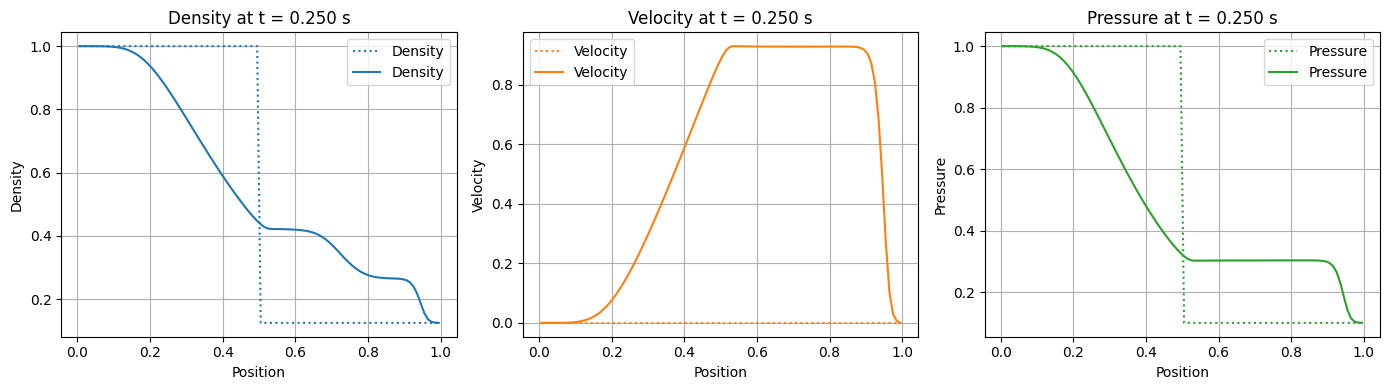

In [7]:
# Visualization of Results
rho, u, p = cons_to_prim(U)

plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.plot(x, rho0, ':', label='Density', color='C0')
plt.plot(x, rho,       label='Density', color='C0')
plt.xlabel('Position')
plt.ylabel('Density')
plt.title('Density at t = {:.3f} s'.format(t_final))
plt.legend()
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(x, u0, ':', label='Velocity', color='C1')
plt.plot(x, u,       label='Velocity', color='C1')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Velocity at t = {:.3f} s'.format(t_final))
plt.legend()
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(x, p0, ':', label='Pressure', color='C2')
plt.plot(x, p,       label='Pressure', color='C2')
plt.xlabel('Position')
plt.ylabel('Pressure')
plt.title('Pressure at t = {:.3f} s'.format(t_final))
plt.legend()
plt.grid()

plt.tight_layout()